In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [8]:
model_loaded = keras.models.load_model('D:\\CV\\_Augmentation\\model_Unet.h5')

In [9]:
IMAGE_SIZE = 256

In [10]:
def read_image(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.image.decode_png(image, channels=1)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE], method='nearest')
        image = tf.cast(image, dtype=np.float32)
    else:
        image = tf.image.decode_png(image, channels=3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = tf.cast(image, dtype=np.float32)
    return image

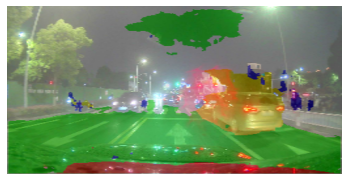

In [11]:
path = 'D:\\IS\\TrainPath\\Night\\TrainNight_272.jpg'
image_tensor = read_image(path)
predictions = model_loaded.predict(np.expand_dims((image_tensor / 255), axis=0))  #(1,256,256,6)
predictions = tf.squeeze(predictions, axis=0) #(256,256,6)
predictions = tf.math.argmax(predictions, axis=2) 

rgb = []
for i in predictions.numpy().ravel():
    temp = [i] * 3
    if (i == 0.0):
        temp = [180, 180, 180]
    elif (i == 1.0):
        temp = [180, 0, 0]
    elif (i == 2.0):
        temp = [0, 180, 0]
    elif (i == 3.0):
        temp = [0, 0, 180]
    elif (i == 4.0):
        temp = [180, 180, 0]
    elif (i == 5.0):
        temp = [0, 180, 180]
    rgb.append(temp)
rgb = np.array(rgb)
rgb = rgb.reshape(256, 256, 3).astype(np.uint8)

added_image = cv2.addWeighted(image_tensor.numpy().astype(np.uint8), 1, rgb, 0.5, -2)
added_image = cv2.resize(added_image, (int(2048/4), int(1024/4)))
plt.imshow(added_image)
plt.axis('off')
plt.show()